In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [6]:
data_training['Activity']

KeyError: 'Activity'

In [2]:

estimator = LinearRegression()
rfecv = RFECV(estimator, cv = 8)
data_training = pd.read_csv(r"C:\Users\Lenovo\Desktop\practice+projex\har\og data\data_training.csv")
act = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
data_training["Activity"].replace(act, list(range(1,7)), inplace= True)

y = data_training["Activity"]
data_training = data_training.drop("Activity", axis=1)
columns = data_training.columns
data_training = pd.DataFrame(data_training, columns= columns)

from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
data_ = scaler.fit_transform(data_training)
data_ = pd.DataFrame(data_, columns= data_training.columns)
data_training = data_


KeyError: 'Activity'

In [19]:
#feature selection using principle component analysis

from sklearn.decomposition import PCA

def net_var(data):
    pca = PCA()
    pca.fit(data)

    #plot the explained variance ratio

    plt.plot( np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explianed Variance')
    plt.title('Cummulative Explained Variance graph')
    plt.show()

def scree_plot(data, k=None):
  pca = PCA()
  pca.fit(data)
  plt.figure(figsize=(10,5))
  plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_*100)
  plt.xlabel("principal components")
  plt.ylabel('variance explained')
  plt.title('Scree plot')

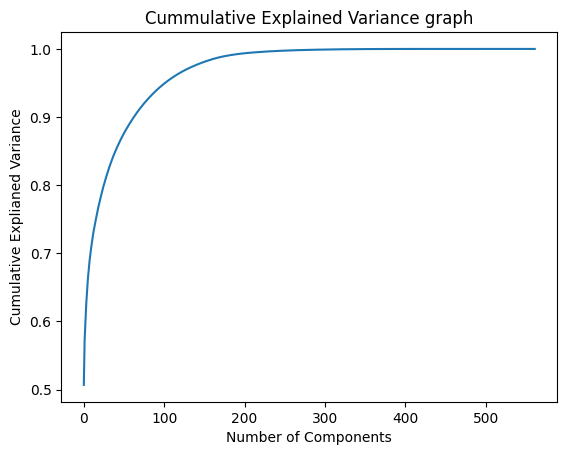

'This curve quantifies how much of the total, 562-dimensional variance is contained within the first N\n components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince'

In [20]:

net_var(data_training)

"""This curve quantifies how much of the total, 562-dimensional variance is contained within the first N
 components. from the graph we can see that approximately 200 principal components are capable of accounting for 99% of the total varaince"""

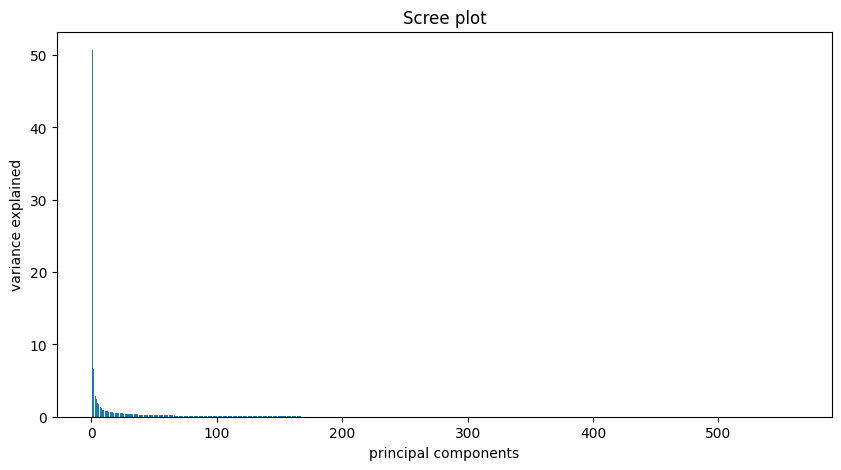

In [21]:
scree_plot(data_training)




In [22]:
#from the scree plot we can see that about 180 features contribute to the cummulative explained variance, let's verify

U, Sigma, Vt = np.linalg.svd(data_training.cov())
sum_first_k = np.sum(Sigma[:180])
sum_all = np.sum(Sigma)

retained_variance = sum_first_k/sum_all
print(retained_variance)

0.9902262765991686


In [23]:
pca = PCA(n_components = 180)
data_pca = pca.fit_transform(data_training)
data_pca = pd.DataFrame(data_pca)
data_pca.columns = [f'PC{i}' for i in range(1,181)]
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180
0,-16.127876,2.165066,-3.112131,0.272678,-6.793172,-4.126212,2.987745,-5.057888,0.715449,3.640292,...,-0.418063,0.500340,0.361860,0.035556,-0.181043,-0.233731,0.997471,0.224404,-0.144400,-0.515497
1,-15.285529,1.400438,0.714409,-2.813515,-4.259211,-1.963174,0.043776,-2.009881,-0.565461,0.184347,...,0.082069,-0.501095,-0.320465,-0.417385,-0.491780,-0.033383,0.087548,0.120238,0.131912,0.295509
2,-15.126334,2.486807,1.789351,-3.717822,-4.173597,-1.267454,0.102934,-1.555753,-0.633620,0.677366,...,-0.047021,0.019184,0.297389,-0.267037,-0.139479,-0.022416,0.073155,-0.003438,0.106312,-0.086157
3,-15.340192,3.929089,1.823029,-2.567368,-3.197204,-0.854802,0.561289,-1.991418,-1.155317,1.495072,...,-0.023639,-0.320467,0.455102,-0.790018,-0.334350,-0.014308,0.245603,0.546425,-0.070472,-0.151103
4,-15.534146,4.611814,2.218282,-2.897450,-3.073507,-0.989951,-1.026249,-0.947489,-0.641201,-1.119084,...,-0.223927,0.120884,0.287013,-0.242076,-0.049234,-0.295868,0.039905,0.048876,0.301673,-0.049456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.456717,-12.546903,-2.026290,-3.457852,1.510678,-2.762406,-3.579238,2.447927,-0.387205,-1.311320,...,-0.111030,0.178171,-0.375897,-0.233865,-0.497945,-0.107583,-0.382616,0.001774,-0.044880,-0.019096
7348,14.214403,-10.264201,-2.405790,-2.802797,1.310661,-4.399022,-2.201077,0.093568,0.586919,-0.703852,...,0.383326,0.040346,-0.104494,-0.016877,-0.095679,-0.451956,-0.473570,-0.069387,-0.166784,-0.291963
7349,14.325088,-12.271555,-4.053320,-3.849882,2.847266,-3.680110,-3.935536,-0.794058,0.822107,1.571190,...,0.182895,0.180918,-0.140195,0.196776,-0.023027,-0.254098,-0.361015,0.067824,-0.247820,0.130030
7350,12.867698,-14.081814,-2.942104,-5.013533,3.926981,-2.203410,-5.403362,0.392192,0.951791,1.648782,...,0.619460,0.327112,-0.180730,0.232973,0.094330,0.086448,-0.383553,0.261399,-0.480335,0.067685


In [24]:
#file_path_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\data_pca.csv"
#data_pca.to_csv(file_path_pca)


In [7]:
#performing recursive feature elimination with cross validation to compare results with pca


y = pd.read_csv(r"C:\Users\Lenovo\Desktop\practice+projex\har\y.csv")

data_rfecv = rfecv.fit_transform(data_training,y)

In [9]:

selected_features_mask = rfecv.support_

# Get the feature names (assuming data_training is a pandas DataFrame)
selected_features = data_training.columns[selected_features_mask]

# Print the selected feature names
print("Selected Features:")
print(list(selected_features))


Selected Features:
['Unnamed: 0', 'tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravity

In [8]:
print(f'number of selected features: {rfecv.n_features_}')  #the number of features the algorithm deems fit based on rfecv

data_rfecv =  pd.DataFrame(data_rfecv, columns = data_training.columns[rfecv.support_==True].tolist() )
display(data_rfecv)

print(type(data_rfecv))


number of selected features: 510


,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.0,0.200642,-0.868814,-0.939441,-0.737529,-0.859817,-0.766437,-0.856036,-0.925985,-0.637379,...,-0.929977,-0.795359,0.025960,-0.276399,0.062940,-0.778427,-0.687219,0.407946,-0.007568,-1.828851
1,1.0,0.055948,-0.875426,-0.923902,-0.849304,-0.868531,-0.848928,-0.871359,-0.892228,-0.889197,...,-1.133978,0.130614,-0.897357,-0.767990,-0.021461,-1.218805,-0.694138,0.409117,0.007875,-1.828851
2,2.0,0.073515,-0.869039,-0.907760,-0.893785,-0.863137,-0.896701,-0.863323,-0.892228,-0.889197,...,-1.133978,1.152336,-0.260878,-0.438316,0.391976,0.151207,-0.702239,0.410288,0.026502,-1.828851
3,3.0,0.066696,-0.870626,-0.940022,-0.921805,-0.864503,-0.925279,-0.863323,-0.957097,-0.927662,...,-1.063749,1.112769,0.591045,0.463155,-0.033637,1.037851,-0.701684,0.414650,0.031714,-1.828851
4,4.0,0.030469,-0.875188,-0.934878,-0.921343,-0.867384,-0.928028,-0.870260,-0.932347,-0.910626,...,-1.133978,-0.149577,-0.138515,-0.240313,0.268486,1.125918,-0.700152,0.425463,0.045225,-1.828851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,7347.0,0.358361,0.913859,1.095963,1.628612,0.821169,1.609686,1.247727,1.188461,1.634933,...,0.943901,-0.778758,-0.876738,-0.829197,1.846034,0.325923,-0.590763,0.605162,0.380984,1.402515
7348,7348.0,-0.009044,0.824887,1.026150,1.586100,0.726245,1.658407,1.076279,1.188461,1.787170,...,0.780778,0.159241,-0.260847,-0.180290,1.948561,-1.459501,-0.551598,0.652468,0.381820,1.402515
7349,7349.0,-0.015668,0.862975,0.810002,2.100249,0.768781,2.266963,0.941403,0.693203,2.084524,...,0.703115,0.277877,1.034784,1.044548,-0.599877,1.406760,-0.565848,0.640597,0.348709,1.402515
7350,7350.0,0.215866,0.860922,0.794902,2.086778,0.754697,2.235301,1.047375,0.554694,2.084524,...,0.784170,-0.443978,1.155541,0.913569,1.558312,1.525574,-0.577668,0.631478,0.293276,1.402515


<class 'pandas.core.frame.DataFrame'>


In [15]:
rfecv.ranking_

array([ 1,  1, 24, 19,  1,  1,  1,  1, 23,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2, 15, 51,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 21,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 48,  1, 29,  1,  1,  1,  1,  1,  1,
        1, 47,  1, 41,  1,  1,  1,  1,  1,  1,  1,  1,  1, 54,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       45,  1,  1,  1, 46,  1,  1,  1,  1, 22,  7,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       37,  1,  1,  1,  1,  1,  1, 53,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [16]:
unselected_features = data_training.columns[~rfecv.support_]
print("Features NOT Selected:")
print(list(unselected_features))


Features NOT Selected:
['tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-mad()-Y', 'tGravityAcc-entropy()-Y', 'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-min()-Z', 'tBodyAccJerk-arCoeff()-Y,1', 'tBodyAccJerk-arCoeff()-Y,3', 'tBodyAccJerk-correlation()-Y,Z', 'tBodyGyro-mean()-Y', 'tBodyGyro-max()-Z', 'tBodyGyro-arCoeff()-Y,4', 'tBodyGyro-arCoeff()-Z,4', 'tBodyGyroJerk-mean()-Y', 'tBodyGyroJerk-mean()-Z', 'tBodyGyroJerk-arCoeff()-X,2', 'tBodyGyroJerk-arCoeff()-Z,1', 'tBodyAccJerkMag-max()', 'tBodyAccJerkMag-min()', 'tBodyAccJerkMag-iqr()', 'tBodyGyroJerkMag-min()', 'tBodyGyroJerkMag-iqr()', 'fBodyAcc-max()-Z', 'fBodyAcc-min()-Y', 'fBodyAcc-maxInds-Y', 'fBodyAcc-maxInds-Z', 'fBodyAcc-meanFreq()-X', 'fBodyAcc-meanFreq()-Y', 'fBodyAccJerk-min()-Y', 'fBodyAccJerk-min()-Z', 'fBodyAccJerk-iqr()-Z', 'fBodyAccJerk-maxInds-Z', 'fBodyAccJerk-skewness()-Z', 'fBodyGyro-mad()-Z', 'fBodyGyro-min()-X', 'fBodyGyro-maxInds-X', 'fBodyGyro-maxInds-Y',

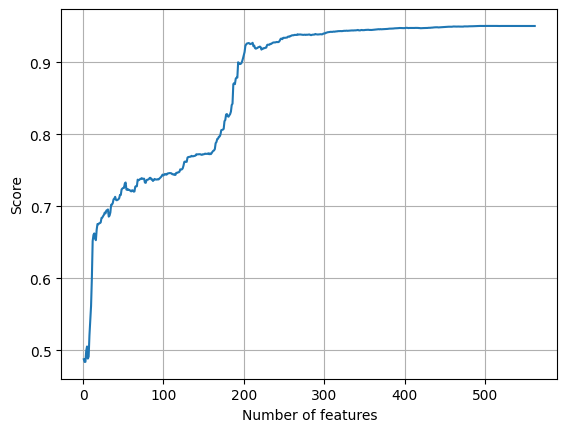

In [27]:




scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




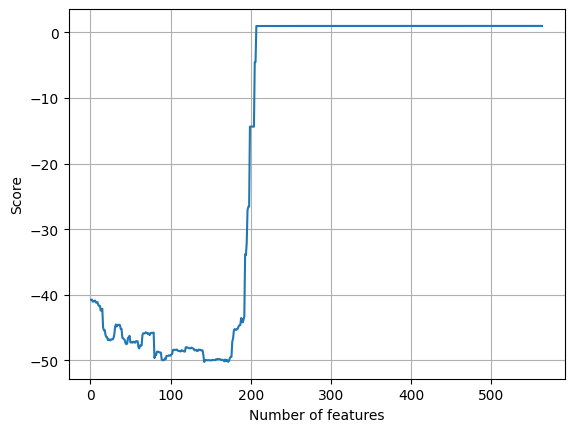

In [17]:




scores = rfecv.cv_results_['mean_test_score']

# Plotting the scores
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores)
plt.grid(True)
plt.show()




In [28]:
print(type(data_rfecv))

<class 'pandas.core.frame.DataFrame'>


In [7]:
from sklearn.model_selection import train_test_split

dataTrain, dataTest, yTrain, yTest = train_test_split(data_training, y, test_size=0.20, random_state=42)
# dataTrain_pca, dataTest_pca,_,_ = train_test_split(data_pca, y, test_size=0.20, random_state=42)
# dataTrain_rfecv, dataTest_rfecv, _,_ = train_test_split(data_rfecv, y, test_size=0.20, random_state=42)



In [9]:
fp_data_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\data_rfecv.csv"
fp_dataTest_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTest_rfecv.csv"
fp_dataTrain_rfecv = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\rfecv stuff\\dataTrain_rfecv.csv"

fp_data_training = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\data_training.csv"
fp_dataTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTest.csv"
fp_dataTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\og data\\dataTrain.csv"

fp_data_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\data_pca.csv"
fp_dataTest_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTest_pca.csv"
fp_dataTrain_pca = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\pca datasets\\dataTrain_pca.csv"


fp_y = "C:\\Users\\Lenovo\Desktop\\practice+projex\\jupyter notebooks\\HAR\\y.csv"
fp_yTest = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTest.csv"
fp_yTrain = "C:\\Users\\Lenovo\\Desktop\\practice+projex\\jupyter notebooks\\HAR\\yTrain.csv"

# data_rfecv.to_csv(fp_data_rfecv)
# dataTest_rfecv.to_csv(fp_dataTest_rfecv)
# dataTrain_rfecv.to_csv(fp_dataTrain_rfecv)

data_training.to_csv(fp_data_training)
dataTest.to_csv(fp_dataTest)
dataTrain.to_csv(fp_dataTrain)

# data_pca.to_csv(fp_data_pca)
# dataTest_pca.to_csv(fp_dataTest_pca)
# dataTrain_pca.to_csv(fp_dataTrain_pca)

y.to_csv(fp_y)
yTest.to_csv(fp_yTest)
yTrain.to_csv(fp_yTrain)



In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def confusionMatrix(yTest, yhat):
  y_true = yTest
  y_pred = yhat

  # Generate confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  print("Confusion Matrix:")
  print(cm)


  # Calculate metrics
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("\nMetrics:")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")





#these are the results without dimensionality reduction using gwo algorithm